In [25]:
import pandas as pd
import geopandas as gpd
import pybdshadow

#Read building data
buildings = gpd.read_file(r'../example/data/bd_demo.json')
buildings = pybdshadow.bd_preprocess(buildings)

buildings = buildings[(buildings['x']>139.698311)&
(buildings['x']<139.699311)&
(buildings['y']>35.533816)&
(buildings['y']<35.534816)]

#Given UTC time
date = pd.to_datetime('2015-01-01 03:45:33.959797119')

In [26]:
buildings['height'] = [42,20,45,9]

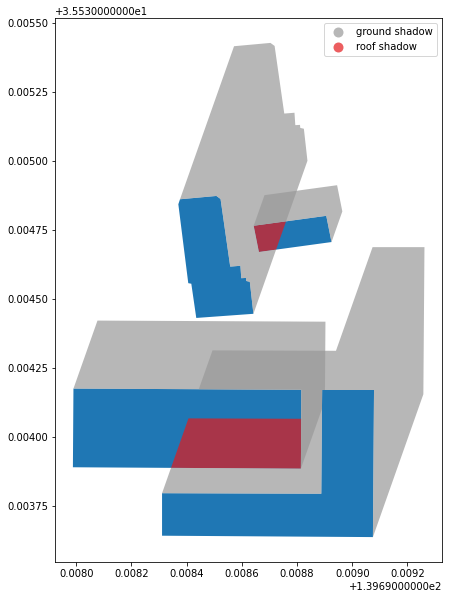

In [27]:

# Calculate shadows
import matplotlib.pyplot as plt
shadows = pybdshadow.bdshadow_sunlight(
    buildings, date, roof=True, include_building=False)
shadows['type'] += ' shadow'

# Visualize buildings and shadows using matplotlib
fig = plt.figure(1, (10, 10))
ax = plt.subplot(111)


# plot buildings
buildings.plot(ax=ax)

# plot shadows
shadows.plot(ax=ax, alpha=0.7,
             column='type',
             categorical=True,
             cmap='Set1_r',
             legend=True)

plt.show()
